In [5]:
import numpy as np
import pandas as pd
import torch

from rdkit import Chem
from rdkit import DataStructs
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score,mean_squared_error
import pandas as pd

from datasets import load_from_disk
ind=1
item='Ames Mutagenicity'

data_dict=load_from_disk(f'dataset\cv{ind}_aug')
data_dict=data_dict.select_columns(['smiles',item])
data_dict['test']=load_from_disk('test')
data_dict

DatasetDict({
    train: Dataset({
        features: ['smiles', 'Ames Mutagenicity'],
        num_rows: 10399
    })
    val: Dataset({
        features: ['smiles', 'Ames Mutagenicity'],
        num_rows: 586
    })
    test: Dataset({
        features: ['smiles', 'ids', 'Ames Mutagenicity'],
        num_rows: 652
    })
})

In [0]:
from utls import GPT2cls,acc_1batch,tokenizer,auc_score_1batch
model=GPT2cls(0.144,0.2,3)

In [18]:
from torch.utils.data import DataLoader
from datasets import Dataset
from accelerate import Accelerator
import pandas as pd
threshold=0.05
train_fp=[]
for i in data_dict['val']:
    mol=Chem.MolFromSmiles(i['smiles'])
    try:
        Tanimoto=Chem.RDKFingerprint(mol)
        train_fp.append(Tanimoto)
    except Exception as e:
        continue

remained_item=[]
for i in data_dict['test']:
    try:
        Tanimoto_test = Chem.RDKFingerprint(Chem.MolFromSmiles(i['smiles']))
    except Exception as e:
        continue
    temp=[]
    for train in train_fp:
        temp.append(DataStructs.FingerprintSimilarity(Tanimoto_test,train))
    mean_simu=sum(temp)/len(temp)

    if mean_simu>threshold:
        remained_item.append(i)

dataset_ad=Dataset.from_pandas(pd.DataFrame(remained_item))
dataset_ad.save_to_disk('dataset_ad')


Saving the dataset (0/1 shards):   0%|          | 0/573 [00:00<?, ? examples/s]

In [0]:
from torch.utils.data import DataLoader
from datasets import Dataset
from accelerate import Accelerator


train_fp=[]
for i in data_dict['val']:
    mol=Chem.MolFromSmiles(i['smiles'])
    try:
        Tanimoto=Chem.RDKFingerprint(mol)
        train_fp.append(Tanimoto)
    except Exception as e:
        continue

remained_item=[]
for i in data_dict['test']:
    try:
        Tanimoto_test = Chem.RDKFingerprint(Chem.MolFromSmiles(i['smiles']))
    except Exception as e:
        continue
    temp=[]
    for train in train_fp:
        temp.append(DataStructs.FingerprintSimilarity(Tanimoto_test,train))
    mean_simu=sum(temp)/len(temp)
    remained_item.append(mean_simu)

plt.figure(dpi=300)
plt.style.use('seaborn-whitegrid')

plt.hist(remained_item, bins=30, color='skyblue', alpha=0.7, edgecolor='black')

plt.title('Toxic Histogram of Tanimoto index')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.tight_layout()

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.axvline(np.mean(remained_item), color='orange', linestyle='dashed', linewidth=2, label='Mean')
plt.legend()

plt.rc('font', size=12)

plt.show()


C:\Users\52551\AppData\Local\Temp\ipykernel_26172\2973666762.py:28: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


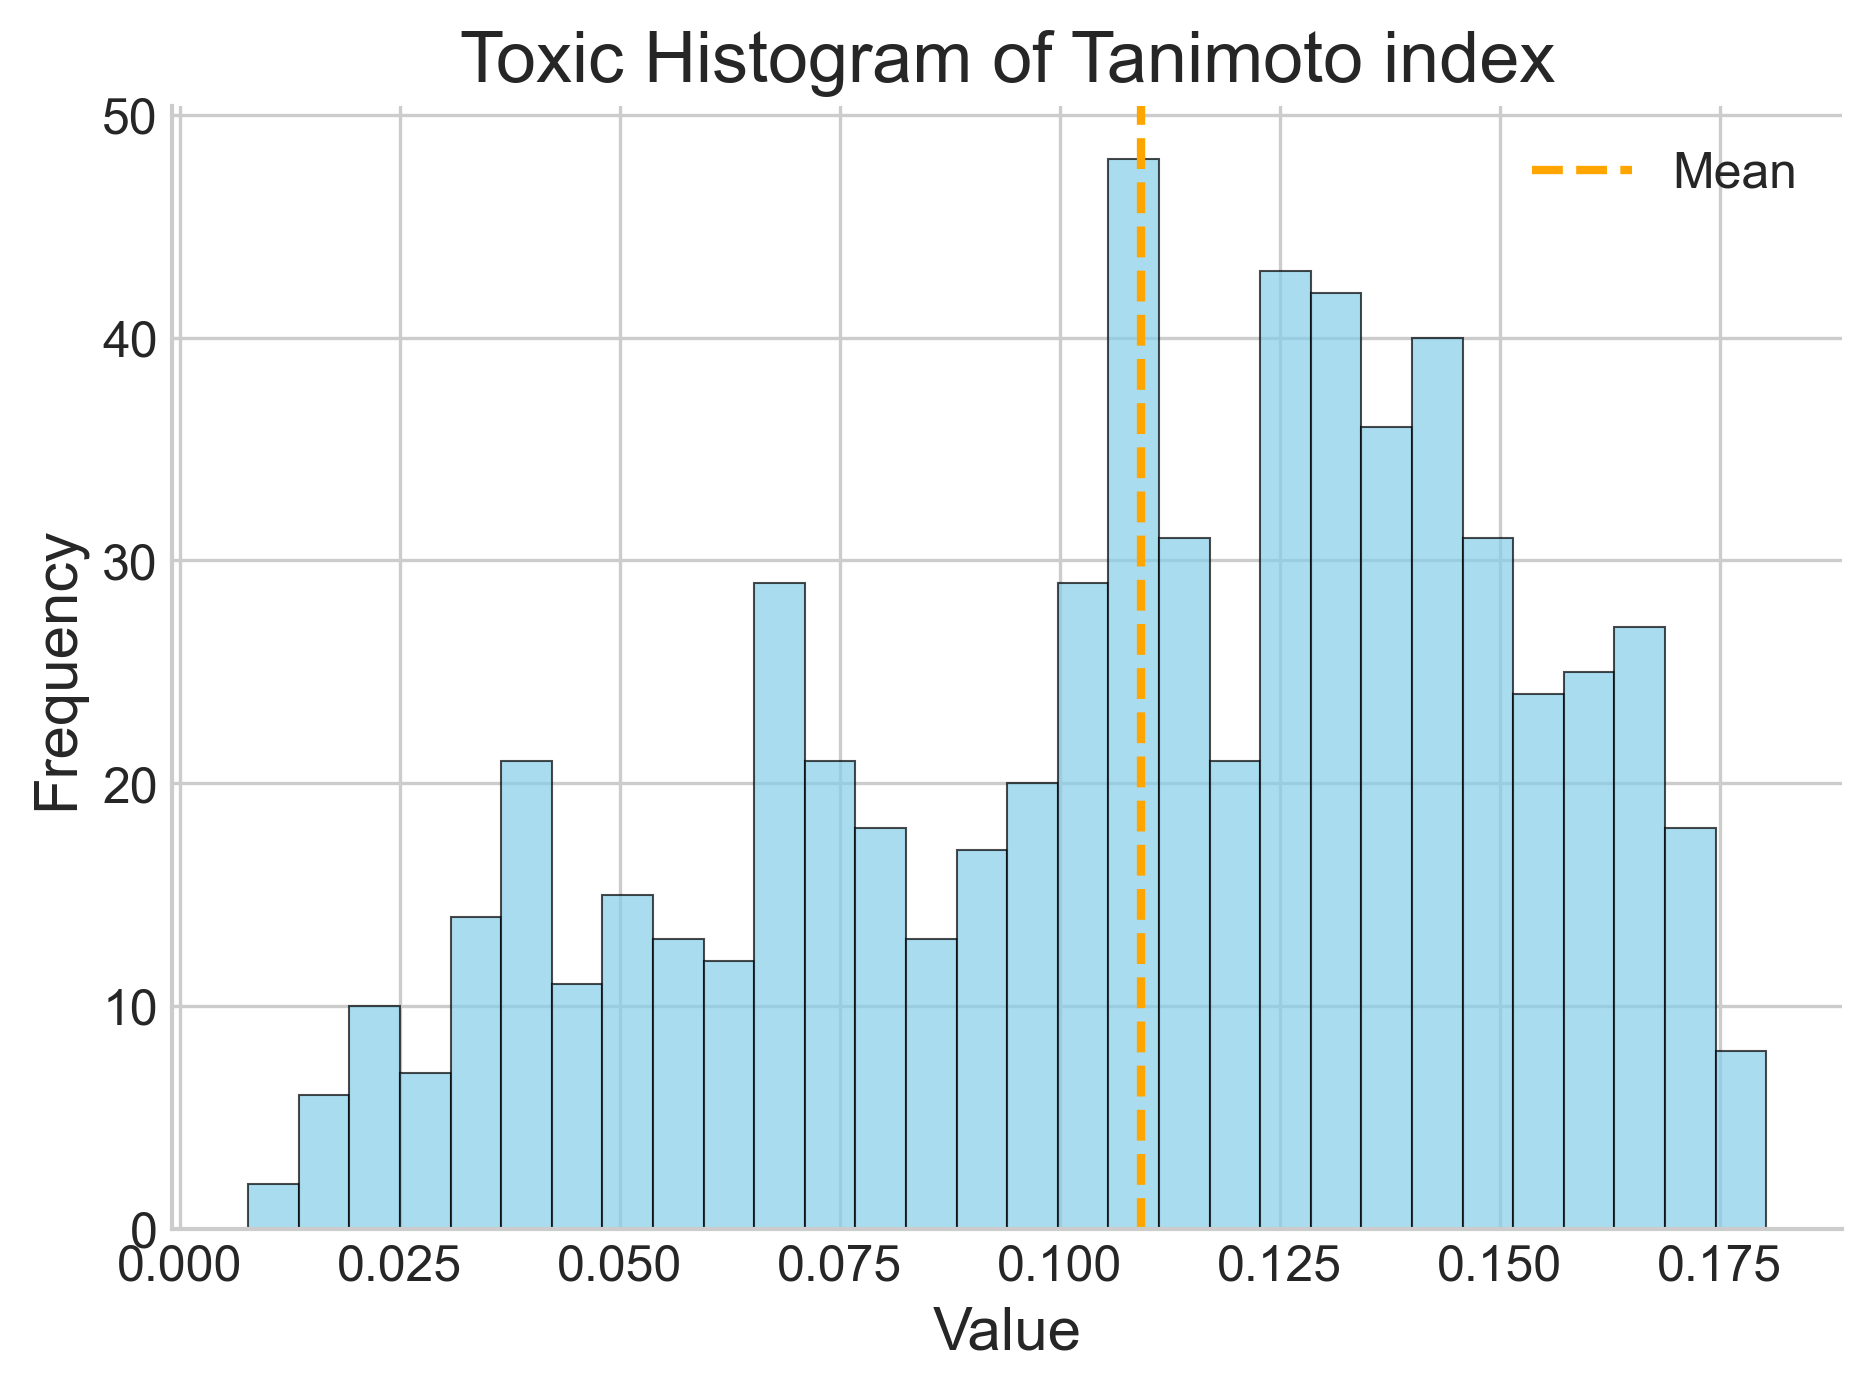

[11:56:25] SMILES Parse Error: syntax error while parsing: NNC(=O)CNC(=O)\C=N\#N
[11:56:25] SMILES Parse Error: Failed parsing SMILES 'NNC(=O)CNC(=O)\C=N\#N' for input: 'NNC(=O)CNC(=O)\C=N\#N'
[11:56:26] SMILES Parse Error: syntax error while parsing: NC(=O)CNC(=O)\C=N\#N
[11:56:26] SMILES Parse Error: Failed parsing SMILES 'NC(=O)CNC(=O)\C=N\#N' for input: 'NC(=O)CNC(=O)\C=N\#N'
[11:56:27] SMILES Parse Error: syntax error while parsing: O=C1NC(=O)\C(=N/#N)\C=N1
[11:56:27] SMILES Parse Error: Failed parsing SMILES 'O=C1NC(=O)\C(=N/#N)\C=N1' for input: 'O=C1NC(=O)\C(=N/#N)\C=N1'
[11:56:27] SMILES Parse Error: syntax error while parsing: CCN(CC(O)C1=CC(=O)\C(=N\#N)\C=C1)N=O
[11:56:27] SMILES Parse Error: Failed parsing SMILES 'CCN(CC(O)C1=CC(=O)\C(=N\#N)\C=C1)N=O' for input: 'CCN(CC(O)C1=CC(=O)\C(=N\#N)\C=C1)N=O'
[11:56:27] SMILES Parse Error: syntax error while parsing: NC(COC(=O)\C=N/#N)C(=O)O
[11:56:27] SMILES Parse Error: Failed parsing SMILES 'NC(COC(=O)\C=N/#N)C(=O)O' for input: 'N

Map:   0%|          | 0/652 [00:00<?, ? examples/s]

652
threshold:0.0,auc:0.8989510588368343,acc:0.8343558282208589


[11:56:53] SMILES Parse Error: syntax error while parsing: NNC(=O)CNC(=O)\C=N\#N
[11:56:53] SMILES Parse Error: Failed parsing SMILES 'NNC(=O)CNC(=O)\C=N\#N' for input: 'NNC(=O)CNC(=O)\C=N\#N'
[11:56:54] SMILES Parse Error: syntax error while parsing: NC(=O)CNC(=O)\C=N\#N
[11:56:54] SMILES Parse Error: Failed parsing SMILES 'NC(=O)CNC(=O)\C=N\#N' for input: 'NC(=O)CNC(=O)\C=N\#N'
[11:56:54] SMILES Parse Error: syntax error while parsing: O=C1NC(=O)\C(=N/#N)\C=N1
[11:56:54] SMILES Parse Error: Failed parsing SMILES 'O=C1NC(=O)\C(=N/#N)\C=N1' for input: 'O=C1NC(=O)\C(=N/#N)\C=N1'
[11:56:55] SMILES Parse Error: syntax error while parsing: CCN(CC(O)C1=CC(=O)\C(=N\#N)\C=C1)N=O
[11:56:55] SMILES Parse Error: Failed parsing SMILES 'CCN(CC(O)C1=CC(=O)\C(=N\#N)\C=C1)N=O' for input: 'CCN(CC(O)C1=CC(=O)\C(=N\#N)\C=C1)N=O'
[11:56:55] SMILES Parse Error: syntax error while parsing: NC(COC(=O)\C=N/#N)C(=O)O
[11:56:55] SMILES Parse Error: Failed parsing SMILES 'NC(COC(=O)\C=N/#N)C(=O)O' for input: 'N

Map:   0%|          | 0/650 [00:00<?, ? examples/s]

650
threshold:0.01,auc:0.8987255348202094,acc:0.8338461538461538


[11:57:22] SMILES Parse Error: syntax error while parsing: NNC(=O)CNC(=O)\C=N\#N
[11:57:22] SMILES Parse Error: Failed parsing SMILES 'NNC(=O)CNC(=O)\C=N\#N' for input: 'NNC(=O)CNC(=O)\C=N\#N'
[11:57:22] SMILES Parse Error: syntax error while parsing: NC(=O)CNC(=O)\C=N\#N
[11:57:22] SMILES Parse Error: Failed parsing SMILES 'NC(=O)CNC(=O)\C=N\#N' for input: 'NC(=O)CNC(=O)\C=N\#N'
[11:57:23] SMILES Parse Error: syntax error while parsing: O=C1NC(=O)\C(=N/#N)\C=N1
[11:57:23] SMILES Parse Error: Failed parsing SMILES 'O=C1NC(=O)\C(=N/#N)\C=N1' for input: 'O=C1NC(=O)\C(=N/#N)\C=N1'
[11:57:24] SMILES Parse Error: syntax error while parsing: CCN(CC(O)C1=CC(=O)\C(=N\#N)\C=C1)N=O
[11:57:24] SMILES Parse Error: Failed parsing SMILES 'CCN(CC(O)C1=CC(=O)\C(=N\#N)\C=C1)N=O' for input: 'CCN(CC(O)C1=CC(=O)\C(=N\#N)\C=C1)N=O'
[11:57:24] SMILES Parse Error: syntax error while parsing: NC(COC(=O)\C=N/#N)C(=O)O
[11:57:24] SMILES Parse Error: Failed parsing SMILES 'NC(COC(=O)\C=N/#N)C(=O)O' for input: 'N

Map:   0%|          | 0/641 [00:00<?, ? examples/s]

641
threshold:0.02,auc:0.8985462735462735,acc:0.8346333853354134


[11:57:51] SMILES Parse Error: syntax error while parsing: NNC(=O)CNC(=O)\C=N\#N
[11:57:51] SMILES Parse Error: Failed parsing SMILES 'NNC(=O)CNC(=O)\C=N\#N' for input: 'NNC(=O)CNC(=O)\C=N\#N'
[11:57:51] SMILES Parse Error: syntax error while parsing: NC(=O)CNC(=O)\C=N\#N
[11:57:51] SMILES Parse Error: Failed parsing SMILES 'NC(=O)CNC(=O)\C=N\#N' for input: 'NC(=O)CNC(=O)\C=N\#N'
[11:57:52] SMILES Parse Error: syntax error while parsing: O=C1NC(=O)\C(=N/#N)\C=N1
[11:57:52] SMILES Parse Error: Failed parsing SMILES 'O=C1NC(=O)\C(=N/#N)\C=N1' for input: 'O=C1NC(=O)\C(=N/#N)\C=N1'
[11:57:53] SMILES Parse Error: syntax error while parsing: CCN(CC(O)C1=CC(=O)\C(=N\#N)\C=C1)N=O
[11:57:53] SMILES Parse Error: Failed parsing SMILES 'CCN(CC(O)C1=CC(=O)\C(=N\#N)\C=C1)N=O' for input: 'CCN(CC(O)C1=CC(=O)\C(=N\#N)\C=C1)N=O'
[11:57:53] SMILES Parse Error: syntax error while parsing: NC(COC(=O)\C=N/#N)C(=O)O
[11:57:53] SMILES Parse Error: Failed parsing SMILES 'NC(COC(=O)\C=N/#N)C(=O)O' for input: 'N

Map:   0%|          | 0/623 [00:00<?, ? examples/s]

623
threshold:0.03,auc:0.897661331956634,acc:0.8346709470304976


[11:58:18] SMILES Parse Error: syntax error while parsing: NNC(=O)CNC(=O)\C=N\#N
[11:58:18] SMILES Parse Error: Failed parsing SMILES 'NNC(=O)CNC(=O)\C=N\#N' for input: 'NNC(=O)CNC(=O)\C=N\#N'
[11:58:18] SMILES Parse Error: syntax error while parsing: NC(=O)CNC(=O)\C=N\#N
[11:58:18] SMILES Parse Error: Failed parsing SMILES 'NC(=O)CNC(=O)\C=N\#N' for input: 'NC(=O)CNC(=O)\C=N\#N'
[11:58:19] SMILES Parse Error: syntax error while parsing: O=C1NC(=O)\C(=N/#N)\C=N1
[11:58:19] SMILES Parse Error: Failed parsing SMILES 'O=C1NC(=O)\C(=N/#N)\C=N1' for input: 'O=C1NC(=O)\C(=N/#N)\C=N1'
[11:58:19] SMILES Parse Error: syntax error while parsing: CCN(CC(O)C1=CC(=O)\C(=N\#N)\C=C1)N=O
[11:58:19] SMILES Parse Error: Failed parsing SMILES 'CCN(CC(O)C1=CC(=O)\C(=N\#N)\C=C1)N=O' for input: 'CCN(CC(O)C1=CC(=O)\C(=N\#N)\C=C1)N=O'
[11:58:20] SMILES Parse Error: syntax error while parsing: NC(COC(=O)\C=N/#N)C(=O)O
[11:58:20] SMILES Parse Error: Failed parsing SMILES 'NC(COC(=O)\C=N/#N)C(=O)O' for input: 'N

Map:   0%|          | 0/589 [00:00<?, ? examples/s]

589
threshold:0.04,auc:0.9038176598601657,acc:0.8404074702886248


[11:58:43] SMILES Parse Error: syntax error while parsing: NNC(=O)CNC(=O)\C=N\#N
[11:58:43] SMILES Parse Error: Failed parsing SMILES 'NNC(=O)CNC(=O)\C=N\#N' for input: 'NNC(=O)CNC(=O)\C=N\#N'
[11:58:43] SMILES Parse Error: syntax error while parsing: NC(=O)CNC(=O)\C=N\#N
[11:58:43] SMILES Parse Error: Failed parsing SMILES 'NC(=O)CNC(=O)\C=N\#N' for input: 'NC(=O)CNC(=O)\C=N\#N'
[11:58:44] SMILES Parse Error: syntax error while parsing: O=C1NC(=O)\C(=N/#N)\C=N1
[11:58:44] SMILES Parse Error: Failed parsing SMILES 'O=C1NC(=O)\C(=N/#N)\C=N1' for input: 'O=C1NC(=O)\C(=N/#N)\C=N1'
[11:58:45] SMILES Parse Error: syntax error while parsing: CCN(CC(O)C1=CC(=O)\C(=N\#N)\C=C1)N=O
[11:58:45] SMILES Parse Error: Failed parsing SMILES 'CCN(CC(O)C1=CC(=O)\C(=N\#N)\C=C1)N=O' for input: 'CCN(CC(O)C1=CC(=O)\C(=N\#N)\C=C1)N=O'
[11:58:45] SMILES Parse Error: syntax error while parsing: NC(COC(=O)\C=N/#N)C(=O)O
[11:58:45] SMILES Parse Error: Failed parsing SMILES 'NC(COC(=O)\C=N/#N)C(=O)O' for input: 'N

Map:   0%|          | 0/568 [00:00<?, ? examples/s]

568
threshold:0.05,auc:0.9038085146169669,acc:0.8433098591549296


[11:59:08] SMILES Parse Error: syntax error while parsing: NNC(=O)CNC(=O)\C=N\#N
[11:59:08] SMILES Parse Error: Failed parsing SMILES 'NNC(=O)CNC(=O)\C=N\#N' for input: 'NNC(=O)CNC(=O)\C=N\#N'
[11:59:08] SMILES Parse Error: syntax error while parsing: NC(=O)CNC(=O)\C=N\#N
[11:59:08] SMILES Parse Error: Failed parsing SMILES 'NC(=O)CNC(=O)\C=N\#N' for input: 'NC(=O)CNC(=O)\C=N\#N'
[11:59:09] SMILES Parse Error: syntax error while parsing: O=C1NC(=O)\C(=N/#N)\C=N1
[11:59:09] SMILES Parse Error: Failed parsing SMILES 'O=C1NC(=O)\C(=N/#N)\C=N1' for input: 'O=C1NC(=O)\C(=N/#N)\C=N1'
[11:59:09] SMILES Parse Error: syntax error while parsing: CCN(CC(O)C1=CC(=O)\C(=N\#N)\C=C1)N=O
[11:59:09] SMILES Parse Error: Failed parsing SMILES 'CCN(CC(O)C1=CC(=O)\C(=N\#N)\C=C1)N=O' for input: 'CCN(CC(O)C1=CC(=O)\C(=N\#N)\C=C1)N=O'
[11:59:10] SMILES Parse Error: syntax error while parsing: NC(COC(=O)\C=N/#N)C(=O)O
[11:59:10] SMILES Parse Error: Failed parsing SMILES 'NC(COC(=O)\C=N/#N)C(=O)O' for input: 'N

Map:   0%|          | 0/547 [00:00<?, ? examples/s]

547
threshold:0.06,auc:0.9000296687884346,acc:0.8391224862888482


[11:59:32] SMILES Parse Error: syntax error while parsing: NNC(=O)CNC(=O)\C=N\#N
[11:59:32] SMILES Parse Error: Failed parsing SMILES 'NNC(=O)CNC(=O)\C=N\#N' for input: 'NNC(=O)CNC(=O)\C=N\#N'
[11:59:33] SMILES Parse Error: syntax error while parsing: NC(=O)CNC(=O)\C=N\#N
[11:59:33] SMILES Parse Error: Failed parsing SMILES 'NC(=O)CNC(=O)\C=N\#N' for input: 'NC(=O)CNC(=O)\C=N\#N'
[11:59:34] SMILES Parse Error: syntax error while parsing: O=C1NC(=O)\C(=N/#N)\C=N1
[11:59:34] SMILES Parse Error: Failed parsing SMILES 'O=C1NC(=O)\C(=N/#N)\C=N1' for input: 'O=C1NC(=O)\C(=N/#N)\C=N1'
[11:59:34] SMILES Parse Error: syntax error while parsing: CCN(CC(O)C1=CC(=O)\C(=N\#N)\C=C1)N=O
[11:59:34] SMILES Parse Error: Failed parsing SMILES 'CCN(CC(O)C1=CC(=O)\C(=N\#N)\C=C1)N=O' for input: 'CCN(CC(O)C1=CC(=O)\C(=N\#N)\C=C1)N=O'
[11:59:34] SMILES Parse Error: syntax error while parsing: NC(COC(=O)\C=N/#N)C(=O)O
[11:59:34] SMILES Parse Error: Failed parsing SMILES 'NC(COC(=O)\C=N/#N)C(=O)O' for input: 'N

Map:   0%|          | 0/521 [00:00<?, ? examples/s]

521
threshold:0.07,auc:0.8960121602288985,acc:0.8349328214971209


[11:59:57] SMILES Parse Error: syntax error while parsing: NNC(=O)CNC(=O)\C=N\#N
[11:59:57] SMILES Parse Error: Failed parsing SMILES 'NNC(=O)CNC(=O)\C=N\#N' for input: 'NNC(=O)CNC(=O)\C=N\#N'
[11:59:57] SMILES Parse Error: syntax error while parsing: NC(=O)CNC(=O)\C=N\#N
[11:59:57] SMILES Parse Error: Failed parsing SMILES 'NC(=O)CNC(=O)\C=N\#N' for input: 'NC(=O)CNC(=O)\C=N\#N'
[11:59:58] SMILES Parse Error: syntax error while parsing: O=C1NC(=O)\C(=N/#N)\C=N1
[11:59:58] SMILES Parse Error: Failed parsing SMILES 'O=C1NC(=O)\C(=N/#N)\C=N1' for input: 'O=C1NC(=O)\C(=N/#N)\C=N1'
[11:59:59] SMILES Parse Error: syntax error while parsing: CCN(CC(O)C1=CC(=O)\C(=N\#N)\C=C1)N=O
[11:59:59] SMILES Parse Error: Failed parsing SMILES 'CCN(CC(O)C1=CC(=O)\C(=N\#N)\C=C1)N=O' for input: 'CCN(CC(O)C1=CC(=O)\C(=N\#N)\C=C1)N=O'
[11:59:59] SMILES Parse Error: syntax error while parsing: NC(COC(=O)\C=N/#N)C(=O)O
[11:59:59] SMILES Parse Error: Failed parsing SMILES 'NC(COC(=O)\C=N/#N)C(=O)O' for input: 'N

Map:   0%|          | 0/477 [00:00<?, ? examples/s]

477
threshold:0.08,auc:0.8947543041606887,acc:0.8343815513626834


[12:00:21] SMILES Parse Error: syntax error while parsing: NNC(=O)CNC(=O)\C=N\#N
[12:00:21] SMILES Parse Error: Failed parsing SMILES 'NNC(=O)CNC(=O)\C=N\#N' for input: 'NNC(=O)CNC(=O)\C=N\#N'
[12:00:21] SMILES Parse Error: syntax error while parsing: NC(=O)CNC(=O)\C=N\#N
[12:00:21] SMILES Parse Error: Failed parsing SMILES 'NC(=O)CNC(=O)\C=N\#N' for input: 'NC(=O)CNC(=O)\C=N\#N'
[12:00:22] SMILES Parse Error: syntax error while parsing: O=C1NC(=O)\C(=N/#N)\C=N1
[12:00:22] SMILES Parse Error: Failed parsing SMILES 'O=C1NC(=O)\C(=N/#N)\C=N1' for input: 'O=C1NC(=O)\C(=N/#N)\C=N1'
[12:00:23] SMILES Parse Error: syntax error while parsing: CCN(CC(O)C1=CC(=O)\C(=N\#N)\C=C1)N=O
[12:00:23] SMILES Parse Error: Failed parsing SMILES 'CCN(CC(O)C1=CC(=O)\C(=N\#N)\C=C1)N=O' for input: 'CCN(CC(O)C1=CC(=O)\C(=N\#N)\C=C1)N=O'
[12:00:23] SMILES Parse Error: syntax error while parsing: NC(COC(=O)\C=N/#N)C(=O)O
[12:00:23] SMILES Parse Error: Failed parsing SMILES 'NC(COC(=O)\C=N/#N)C(=O)O' for input: 'N

Map:   0%|          | 0/459 [00:00<?, ? examples/s]

459
threshold:0.09,auc:0.891279364213643,acc:0.8300653594771242


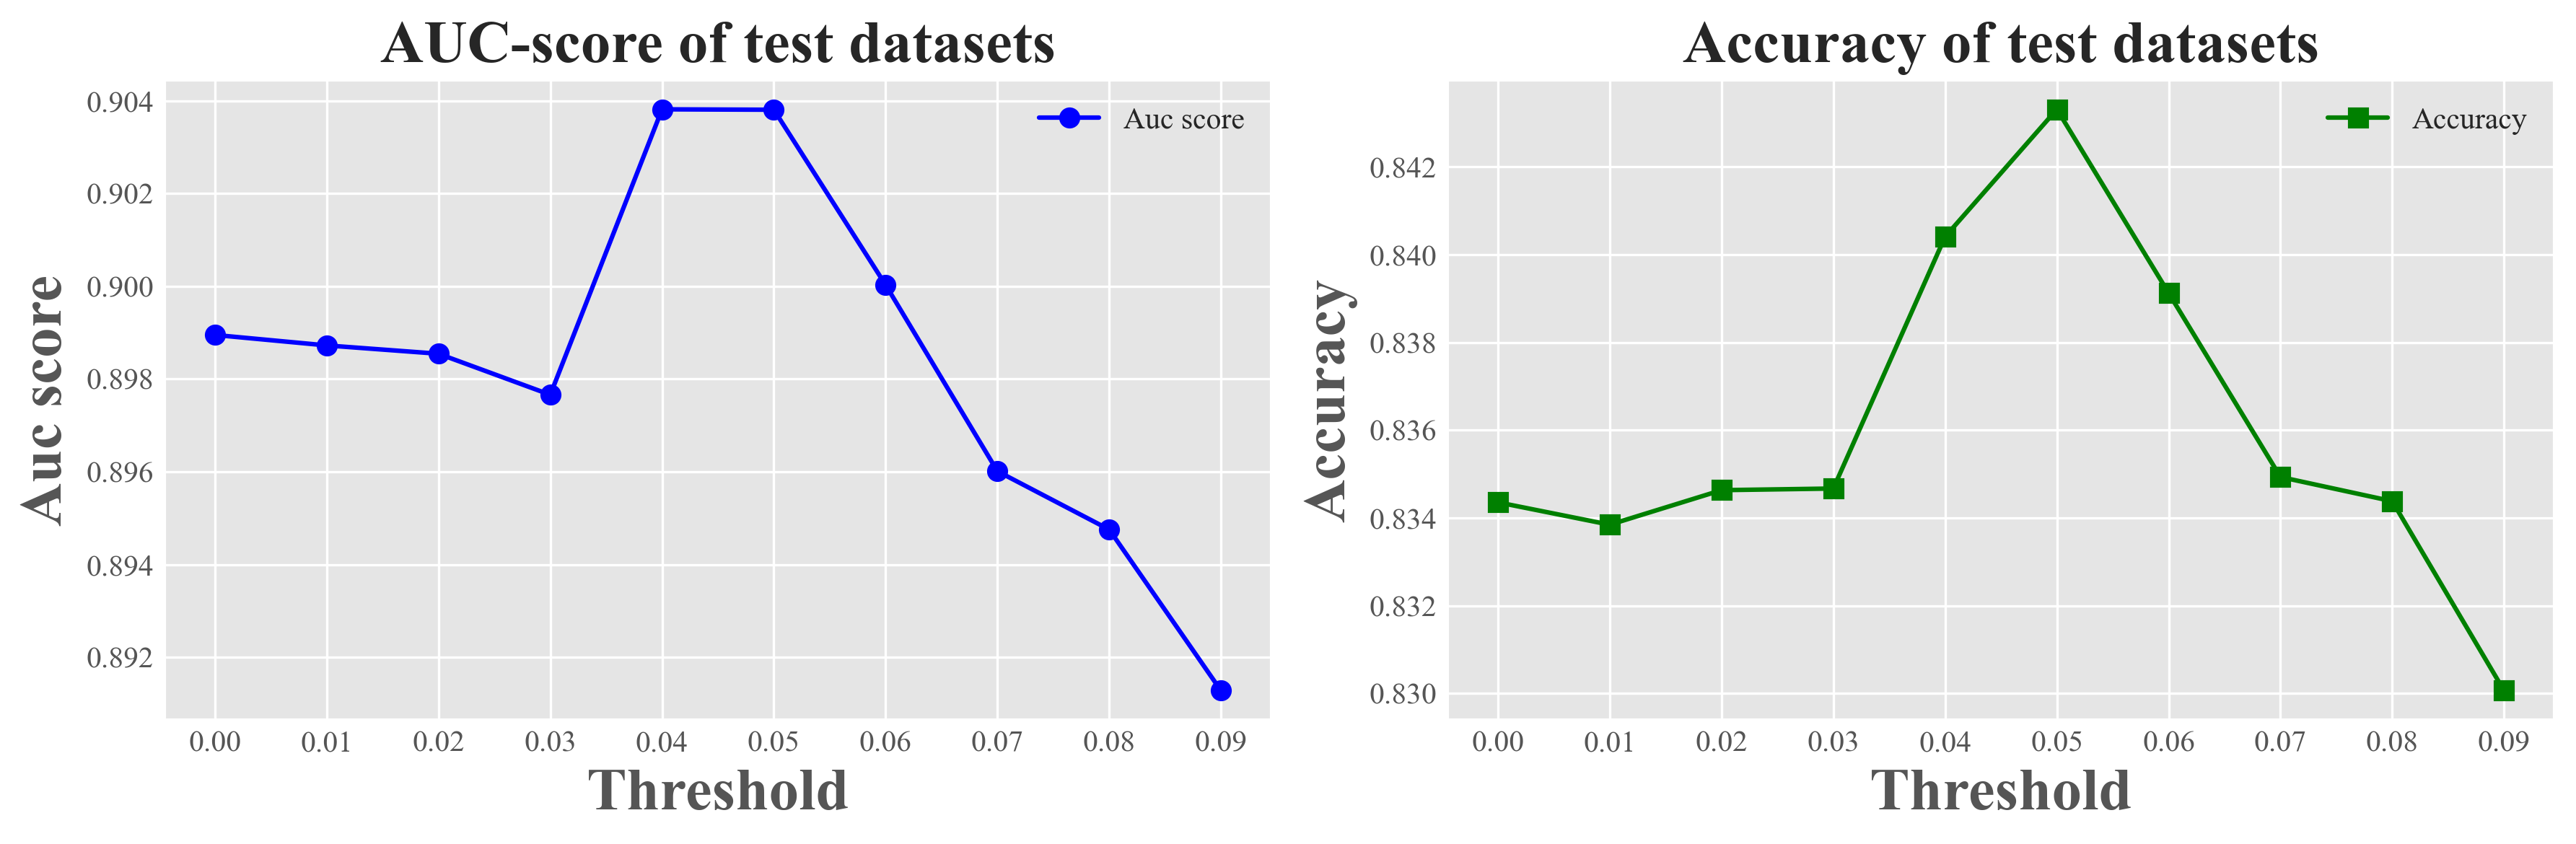

In [10]:
from torch.utils.data import DataLoader
from datasets import Dataset
from accelerate import Accelerator
thresholds=np.arange(0,0.1,0.01)
outputs_aucs=[]
outputs_accs=[]
for threshold in thresholds:
    train_fp=[]
    for i in data_dict['train']:
        mol=Chem.MolFromSmiles(i['smiles'])
        try:
            Tanimoto=Chem.RDKFingerprint(mol)
            train_fp.append(Tanimoto)
        except Exception as e:
            continue

    remained_item=[]
    for i in data_dict['test']:
        try:
            Tanimoto_test = Chem.RDKFingerprint(Chem.MolFromSmiles(i['smiles']))
        except Exception as e:
            continue
        temp=[]
        for train in train_fp:
            temp.append(DataStructs.FingerprintSimilarity(Tanimoto_test,train))
        mean_simu=sum(temp)/len(temp)

    # plt.figure(dpi=300)
    # plt.style.use('seaborn-whitegrid')
    #
    # plt.hist(remained_item, bins=20, color='skyblue', alpha=0.7, edgecolor='black')
    #
    # plt.title('Histogram of Tanimoto_index')
    # plt.xlabel('Value')
    # plt.ylabel('Frequency')
    #
    # plt.tight_layout()
    #
    # plt.gca().spines['top'].set_visible(False)
    # plt.gca().spines['right'].set_visible(False)
    #
    # plt.axvline(np.mean(remained_item), color='orange', linestyle='dashed', linewidth=2, label='Mean')
    # plt.legend()
    #
    # plt.rc('font', size=12)
    #
    # plt.show()

        if mean_simu>threshold:
            remained_item.append(i)
    data_pd=pd.DataFrame(remained_item)
    datasets=Dataset.from_pandas(data_pd)

    tokenized_dataset = datasets.map(
    lambda element: tokenizer(element['smiles']), batched=True)

    tokenized_dataset = tokenized_dataset.select_columns(['input_ids', 'attention_mask', item])


    loader_test=DataLoader(tokenized_dataset,batch_size=1)


    model.load_state_dict(torch.load('best_val.model'))
    model,loader_test=Accelerator().prepare(model,loader_test)

    auc=auc_score_1batch(loader_test,model)
    acc=acc_1batch(loader_test,model)
    outputs_accs.append(acc)
    outputs_aucs.append(auc)
    print(len(tokenized_dataset))
    print(f'threshold:{threshold},auc:{auc},acc:{acc}')

    # for item in remained_item:
    #     smi = item.smiles
    #     condition = smi == data['smi']
    #     data.loc[condition, 'AD_screening'] = 1
    # data.to_excel('data_final.xlsx')

# Set up a custom style for the plots
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'Times New Roman'

# Create a figure with a defined size and resolution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), dpi=300)

# Plot the first graph (RMSE_test)
ax1.plot(thresholds, outputs_aucs, marker='o', color='b', label='Auc score')
ax1.set_xticks(thresholds)
ax1.set_xlabel('Threshold', fontsize=20, fontweight='bold')
ax1.set_ylabel('Auc score', fontsize=20, fontweight='bold')
ax1.set_title('AUC-score of test datasets', fontsize=20, fontweight='bold')
ax1.legend()


# Plot the second graph (R2_score)
ax2.plot(thresholds, outputs_accs, marker='s', color='g', label='Accuracy')
ax2.set_xticks(thresholds)
ax2.set_xlabel('Threshold', fontsize=20, fontweight='bold')
ax2.set_ylabel('Accuracy', fontsize=20, fontweight='bold')
ax2.set_title('Accuracy of test datasets', fontsize=20, fontweight='bold')
ax2.legend()
# Adjust the layout to avoid overlapping labels and titles
plt.tight_layout()

# Save the figure (optional)
# plt.savefig('output_figure.png', dpi=300)

# Show the plots
plt.show()
